In [8]:
from numpy import asarray
from numpy import unique
from numpy import argmax
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [9]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

11501568/11490434 [==============================] - 1s 0us/step


In [10]:
in_shape = x_train.shape[1:]
n_classes = len(unique(y_train))
print(in_shape, n_classes)

(28, 28, 1) 10


In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1,validation_data = (x_test,y_test))

Epoch 1/10
469/469 [==============================] - 16s 33ms/step - loss: 0.3333 - accuracy: 0.8986 - val_loss: 0.0852 - val_accuracy: 0.9748
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1325 - accuracy: 0.9613 - val_loss: 0.0593 - val_accuracy: 0.9807
Epoch 3/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0987 - accuracy: 0.9707 - val_loss: 0.0510 - val_accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0798 - accuracy: 0.9758 - val_loss: 0.0454 - val_accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0452 - val_accuracy: 0.9848
Epoch 6/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0420 - val_accuracy: 0.9849
Epoch 7/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.0422 - val_accuracy:

In [13]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

Accuracy: 0.987
Predicted: class=5


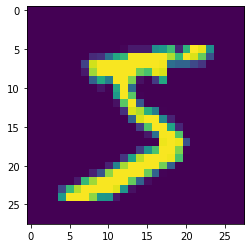

In [14]:
import matplotlib.pyplot as plt
plt.imshow(image)

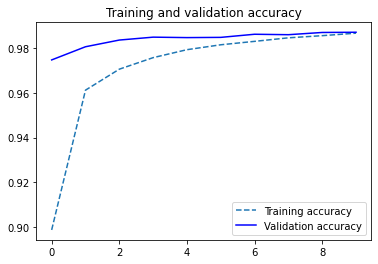

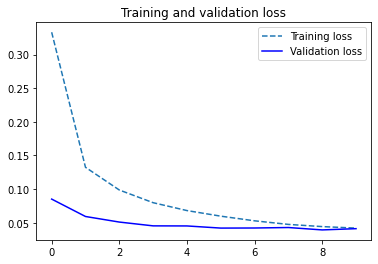

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =range(len(accuracy))
plt.plot(epochs, accuracy, '--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()